<a href="https://colab.research.google.com/github/Sameer-Tahir/Project_DS/blob/main/DL_Models/Dl_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Sameer-Tahir/Project_DS.git

Cloning into 'Project_DS'...
remote: Enumerating objects: 294, done.
remote: Counting objects: 100% (181/181), done.
remote: Compressing objects: 100% (148/148), done.
Receiving objects: 100% (294/294), 16.38 MiB | 9.35 MiB/s, done.
remote: Total 294 (delta 71), reused 6 (delta 6), pack-reused 113 (from 1)
Resolving deltas: 100% (95/95), done.


In [13]:
# Import libraries
import pandas as pd   # data processing
import numpy as np    # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
import json
from tensorflow.keras import layers, models, callbacks
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import json
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from tensorflow.keras import layers, models, callbacks
import numpy as np, joblib
from sklearn.metrics import precision_recall_fscore_support



In [9]:
# -----------------------
# Load your splits
# -----------------------
train_df = pd.read_csv("dfk1_train.csv")
val_df   = pd.read_csv("dfk1_val.csv")
test_df  = pd.read_csv("dfk1_test.csv")

In [10]:
!unzip -o dl_preprocessed.zip

Archive:  dl_preprocessed.zip
  inflating: dl_data_windows.npz     
  inflating: label_encoder.pkl       
  inflating: scaler.pkl              


In [11]:
# Load arrays
data = np.load("dl_data_windows.npz", allow_pickle=True)
X_train, y_train = data["X_train"], data["y_train"]
X_val, y_val     = data["X_val"],   data["y_val"]
X_test, y_test   = data["X_test"],  data["y_test"]
feature_cols     = data["feature_cols"].tolist()
classes          = data["classes"]

# Load encoder & scaler
le = joblib.load("label_encoder.pkl")
scaler = joblib.load("scaler.pkl")

print("✅ Data loaded successfully")
print("Train:", X_train.shape, y_train.shape)
print("Val:",   X_val.shape, y_val.shape)
print("Test:",  X_test.shape, y_test.shape)
print("Classes:", classes)

✅ Data loaded successfully
Train: (4835, 6, 222) (4835,)
Val: (591, 6, 222) (591,)
Test: (590, 6, 222) (590,)
Classes: ['aggressive-scan' 'cryptojacking' 'icmp-flood' 'icmp-fragmentation'
 'icmp-fragmentation_old' 'none' 'os-fingerprinting' 'os-scan' 'port-scan'
 'push-ack-flood' 'serice-detection' 'service-detection' 'syn-flood'
 'syn-stealth' 'synonymous-ip-flood' 'tcp-flood' 'udp-flood' 'vuln-scan']


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_4 (Bidirectional) │ (None, 6, 128)         │       110,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_4           │ (None, 6, 128)         │           256 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_9 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 18)             │         1,170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165,842 (647.82 KB)

 Trainable params: 165,842 (647.82 KB)

 Non-trainable params: 0 (0.00 B)

Class Weights: {0: np.float64(1.8524904214559388), 1: np.float64(0.1967846967846968), 2: np.float64(2.633442265795207), 3: np.float64(2.827485380116959), 4: np.float64(5.481859410430839), 5: np.float64(0.14662178554099953), 6: np.float64(2.7409297052154193), 7: np.float64(5.715130023640662), 8: np.float64(1.6788194444444444), 9: np.float64(2.633442265795207), 10: np.float64(5.596064814814815), 11: np.float64(2.41991991991992), 12: np.float64(2.686111111111111), 13: np.float64(1.9897119341563787), 14: np.float64(2.7409297052154193), 15: np.float64(2.71324354657688), 16: np.float64(2.7980324074074074), 17: np.float64(1.7556281771968048)}
Epoch 1/100
149/152 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5756 - loss: 2.4672
Epoch 1: val_accuracy improved from -inf to 0.75973, saving model to GRU_best.keras
152/152 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.5785 - loss: 2.4582 - val_accuracy: 0.7597 - val_loss: 0.6762 - learning_rate: 0.0010
Epoch 2/100
150/152 ━━━━━━━━━━━━━━━━━━━━ 

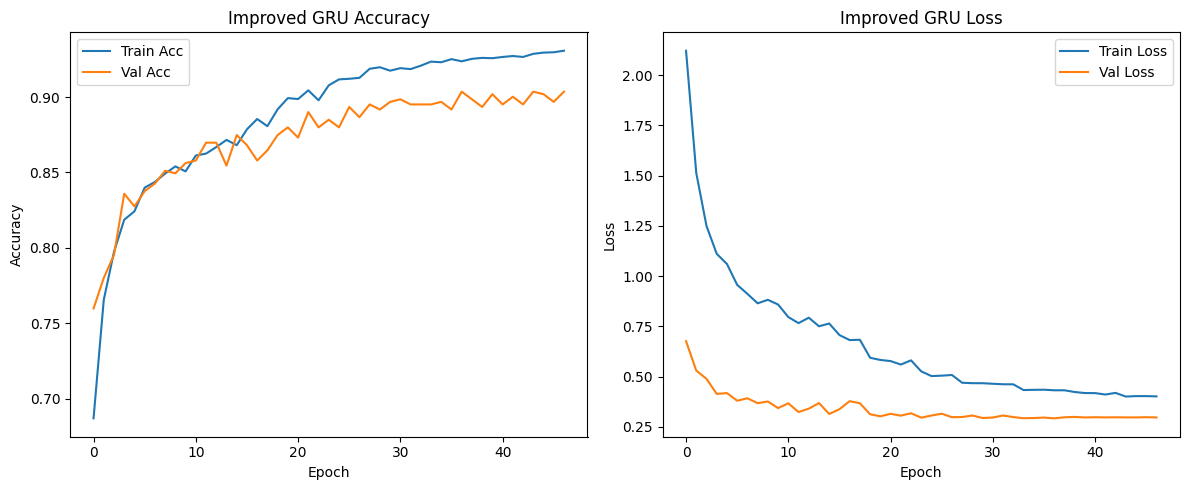

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step

✅ GRU Results
Accuracy: 0.8949152542372881
Macro-F1: 0.7241018624533118
                        precision    recall  f1-score   support

       aggressive-scan       0.83      0.83      0.83        18
         cryptojacking       1.00      1.00      1.00       165
            icmp-flood       0.75      0.69      0.72        13
    icmp-fragmentation       1.00      1.00      1.00        13
icmp-fragmentation_old       0.43      0.50      0.46         6
                  none       1.00      1.00      1.00       220
     os-fingerprinting       0.47      0.62      0.53        13
               os-scan       0.36      0.83      0.50         6
             port-scan       0.85      0.58      0.69        19
        push-ack-flood       1.00      1.00      1.00        12
      serice-detection       0.42      0.83      0.56         6
     service-detection       0.17      0.14      0.15        14
             syn-flood       1.00      1.00      1.00 

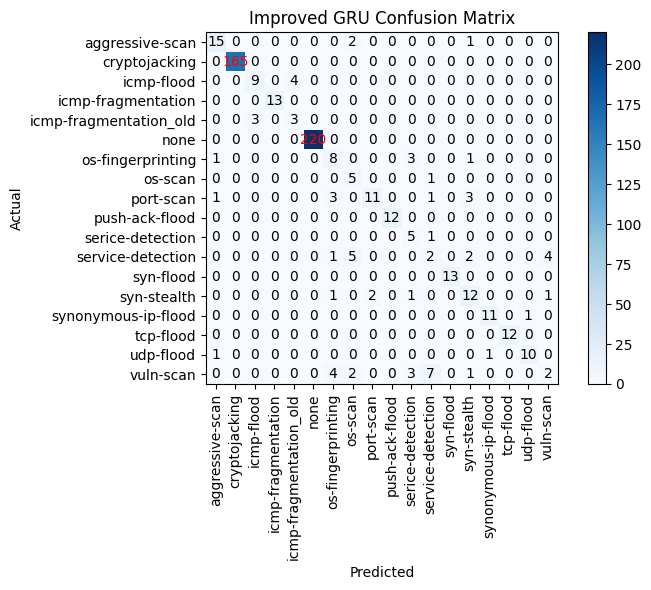

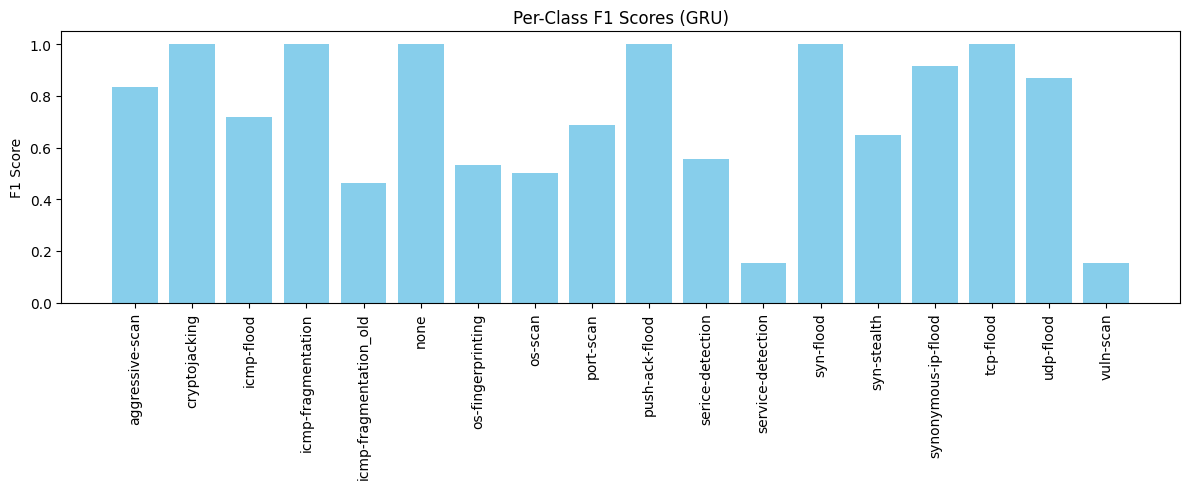

📂 Saved: GRU_final.keras, results_gru_improved.json, GRU_improved_training_curves.png, GRU_improved_confusion_matrix.png


In [16]:
# -----------------------
# Build Improved GRU model
# -----------------------
def build_gru(window, n_features, n_classes):
    model = models.Sequential([
        layers.Input(shape=(window, n_features)),
        layers.Bidirectional(layers.GRU(64, return_sequences=True)),
        layers.LayerNormalization(),  # 👈 helps stabilize training
        layers.GRU(64, return_sequences=False),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(64, activation="relu"),   # extra Dense layer
        layers.Dense(n_classes, activation="softmax")
    ])
    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

gru_model = build_gru(X_train.shape[1], X_train.shape[2], len(classes))
gru_model.summary()

# -----------------------
# Callbacks
# -----------------------
early_stop = callbacks.EarlyStopping(
    monitor="val_accuracy", patience=10, mode="max", restore_best_weights=True
)

lr_scheduler = callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=3, verbose=1
)

checkpoint = callbacks.ModelCheckpoint(
    "GRU_best.keras", monitor="val_accuracy", save_best_only=True, verbose=1
)

# -----------------------
# Class Weights
# -----------------------
from sklearn.utils.class_weight import compute_class_weight

class_weights_array = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights_array))
print("Class Weights:", class_weights)

# -----------------------
# Train Model
# -----------------------
history = gru_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,              # allow longer training
    batch_size=32,           # smaller batch for more updates
    callbacks=[early_stop, lr_scheduler, checkpoint],
    class_weight=class_weights,
    verbose=1
)

# -----------------------
# Plot Accuracy & Loss
# -----------------------
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Improved GRU Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Improved GRU Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.savefig("GRU_improved_training_curves.png")
plt.show()

# -----------------------
# Evaluate on Test Set
# -----------------------
y_pred_test = np.argmax(gru_model.predict(X_test), axis=-1)
test_acc = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test, average="macro")
report = classification_report(
    y_test, y_pred_test, target_names=classes, zero_division=0
)
cm = confusion_matrix(y_test, y_pred_test)

print("\n✅ GRU Results")
print("Accuracy:", test_acc)
print("Macro-F1:", test_f1)
print(report)

# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap="Blues")
plt.title("Improved GRU Confusion Matrix")
plt.colorbar()
plt.xticks(np.arange(len(classes)), classes, rotation=90)
plt.yticks(np.arange(len(classes)), classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center",
                 color="red" if cm[i, j] > cm.max()/2 else "black")
plt.tight_layout()
plt.savefig("GRU_improved_confusion_matrix.png")
plt.show()

from sklearn.metrics import precision_recall_fscore_support

prec, rec, f1, support = precision_recall_fscore_support(
    y_test, y_pred_test, zero_division=0
)

plt.figure(figsize=(12, 5))
plt.bar(classes, f1, color="skyblue")
plt.xticks(rotation=90)
plt.title("Per-Class F1 Scores (GRU)")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.savefig("GRU_f1_per_class.png")
plt.show()


# -----------------------
# Save model + results
# -----------------------
gru_model.save("GRU_final.keras")

results = {
    "accuracy": float(test_acc),
    "macro_f1": float(test_f1),
    "report": report,
    "confusion_matrix": cm.tolist()
}

import json
with open("results_gru_improved.json", "w") as f:
    json.dump(results, f, indent=4)

print("📂 Saved: GRU_final.keras, results_gru_improved.json, GRU_improved_training_curves.png, GRU_improved_confusion_matrix.png")


In [8]:
# # Setup Git (first time only per machine)
# !git config --global user.email "your_email@example.com"
# !git config --global user.name "your_name"

# # Save current notebook (from Colab)
# !jupyter nbconvert --to notebook --execute my_notebook.ipynb --output trained_notebook.ipynb

# # Push to GitHub
# !git init
# !git remote add origin https://github.com/USERNAME/REPO.git
# !git add .
# !git commit -m "Save DL model results"
# !git branch -M main
# !git push -u origin main
